# Thư viện


In [1]:
!pip install fuzzywuzzy
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 KB 41.3 MB/s eta 0:00:00


In [2]:
from ast import Continue
from http.client import CONTINUE
import requests as rq
import numpy as np
from bs4 import BeautifulSoup as bs

import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path
import glob
from fuzzywuzzy import process
from pandas import ExcelFile
import matplotlib.pyplot as plt
import openpyxl
import underthesea
import nltk #ngunhia
from fuzzywuzzy import fuzz, process
import re
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
output_excel_path='/content/drive/MyDrive/Báo Cáo Nhóm 3/test.xlsx'

#Crawl data


In [ ]:
def crawdatadanhgia():
    r = rq.get("https://www.tin247.news/danh-gia-19-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/danh-gia-19-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        

    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatacongnghe():
    r = rq.get("https://www.tin247.news/cong-nghe-4-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/cong-nghe-4-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==53):
            break
        
 

In [ ]:
def crawdatakinhte():
    r = rq.get("https://www.tin247.news/kinh-te-3-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/kinh-te-3-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdataxe():
    r = rq.get("https://www.tin247.news/xe-14-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/xe-14-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatagiaitri():
    r = rq.get("https://www.tin247.news/giai-tri-8-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/giai-tri-8-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatathethao():
    r = rq.get("https://www.tin247.news/the-thao-5-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/giai-tri-8-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdataxahoi():
    r = rq.get("https://www.tin247.news/xa-hoi-1-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/xa-hoi-1-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==50):
            break
        
 

In [ ]:
def crawdatasuckhoe():
    r = rq.get("https://www.tin247.news/suc-khoe-24-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/suc-khoe-24-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatathegioi():
    r = rq.get("https://www.tin247.news/the-gioi-2-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/the-gioi-2-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatavieclam():
    r = rq.get("https://www.tin247.news/viec-lam-15-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/viec-lam-15-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatagiaoduc():
    r = rq.get("https://www.tin247.news/giao-duc-11-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/giao-duc-11-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatachinhtri():
    r = rq.get("https://www.tin247.news/chinh-tri-29-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/chinh-tri-29-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdataphapluat():
    r = rq.get("https://www.tin247.news/phap-luat-6-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/phap-luat-6-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatagame():
    r = rq.get("https://www.tin247.news/game-28-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/game-28-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatachuyenla():
    r = rq.get("https://www.tin247.news/chuyen-la-13-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/chuyen-la-13-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatathugian():
    r = rq.get("https://www.tin247.news/thu-gian-17-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/thu-gian-17-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdataamthuc():
    r = rq.get("https://www.tin247.news/am-thuc-22-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/am-thuc-22-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatagiaothong():
    r = rq.get("https://www.tin247.news/giao-thong-23-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/giao-thong-23-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatadoisong():
    r = rq.get("https://www.tin247.news/doi-song-10-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/doi-song-10-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==51):
            break
        
 

In [ ]:
def crawdatagiadinh():
    r = rq.get("https://www.tin247.news/gia-dinh-31-"+str(1)+".tintuc")
    soup = bs(r.content,"html.parser")    
    titles = soup.find_all('li',class_="_box item")
    
    links = [link.find('a').attrs["href"] for link in titles]

    i=0
    for t in range(2,5):
        r = rq.get("https://www.tin247.news/gia-dinh-31-"+str(t)+".tintuc")
        soup = bs(r.content,"html.parser")
        
        titles= soup.find_all('li',class_="_box item")
        
        links += [link.find('a').attrs["href"] for link in titles]
        
    for link in links:
        i=i+1
        news = rq.get("https://www.tin247.news"+link)
        soup = bs(news.content,"html.parser")
        print("**************************************************************************")            
        try:
          title=soup.find("h1",class_="title").text
          print("Tiêu đề:",title.lower())
        except:CONTINUE
        try:
          mota = soup.find("p",class_="teaser").text
          print("Mô tả:", mota.lower())
        except:CONTINUE
        try:
          theloai=soup.find("a",class_="cat-name").text
          print("Thể loại:", theloai.lower())
        except:CONTINUE
        
        try:
          noidung=soup.find("div",class_="content").text.strip()
          print("Nội dung:", noidung.lower())
        except:CONTINUE
        print(i)
        input_detail.append([title, theloai,  mota, noidung])
        if(i==30):
            break
        
 

#chạy crawldata

In [ ]:

def crawdata():
  crawdatadanhgia()
  crawdatacongnghe()
  crawdatakinhte()
  crawdataxe()
  crawdatagiaitri()
  crawdatathethao()
  crawdataxahoi()
  crawdatasuckhoe()
  crawdatathegioi()
  crawdatavieclam()
  crawdatagiaoduc()
  crawdatachinhtri()
  crawdataphapluat()
  crawdatagame()
  crawdatachuyenla()
  crawdatathugian()
  crawdataamthuc()
  crawdatagiaothong()
  crawdatadoisong()
  crawdatagiadinh()

In [ ]:
input_detail =[['Tiêu Đề', 'Thể Loại', 'Mô Tả' , 'Nội Dung']]
crawdata()


Output hidden; open in https://colab.research.google.com to view.

#Lưu  Vào file excel


In [ ]:

def output_Excel(input_detail,output_excel_path):
  #Xác định số hàng và cột lớn nhất trong file excel cần tạo
  row = len(input_detail)
  column = len(input_detail[0])

  #Tạo một workbook mới và active nó
  wb = openpyxl.Workbook()
  ws = wb.active
  
  #Dùng vòng lặp for để ghi nội dung từ input_detail vào file Excel
  for i in range(0,row):
    for j in range(0,column):
      v=input_detail[i][j]
      ws.cell(column=j+1, row=i+1, value=v)

  #Lưu lại file Excel
  wb.save(output_excel_path)

In [ ]:
output_Excel(input_detail,output_excel_path)

# Đọc file excel

In [ ]:
df = pd.read_excel(output_excel_path)
df

,Tiêu Đề,Thể Loại,Mô Tả,Nội Dung
0,Bí mật ẩn sau chương trình đào tạo phi hành gi...,Đánh giá,Trong lúc những gương mặt trong nhóm du hành g...,Nhóm phi hành gia tiềm năng đầu tiên giảm xuốn...
1,Diễn biến bất ngờ vụ hacker rao bán mã nguồn B...,Đánh giá,Thông báo mới của hacker trong vụ việc ồn ào l...,Liên quan vụ hacker rao bán mã nguồn phần mềm ...
2,Tương lai của iPhone Mini chính là iPhone gập lại,Đánh giá,"Trong tương lai, những chiếc iPhone Mini sẽ đư...","Vào năm ngoái, iPhone 12 Mini là một chiếc điệ..."
3,Google sắp tung điện thoại gập lại Android hoà...,Đánh giá,Google là một trong số những nhà sản xuất smar...,"Năm nay, chúng ta đã chứng kiến ​​sự ra mắt củ..."
4,Cách lấy lại mật khẩu Facebook dễ dàng,Đánh giá,Quên mất mật khẩu để đăng nhập tài khoản Faceb...,Có khá nhiều người dùng đăng nhập tài khoản Fa...
...,...,...,...,...
995,Giáo sư nổi tiếng nói: Trẻ có EQ thấp cha mẹ n...,Gia đình,"Khi trẻ có EQ thấp, điều này liên quan mật thi...",Một số bậc cha mẹ khi con còn nhỏ chỉ chú ý đế...
996,"Cha kiếm 54 tỷ/ năm nhưng con bỏ học, 21 tuổi ...",Gia đình,Khác biệt trong cách dạy con của cha mẹ sẽ dẫn...,Sự giáo dục của cha mẹ tạo nên tương lai con t...
997,90% cha mẹ mắc sai lầm trong 2 giai đoạn quan ...,Gia đình,Nhiều cha mẹ chỉ chú ý đến kỳ thi tuyển sinh t...,Giai đoạn quan trọng đầu tiên: Năm lớp 4 và 5I...
998,Lá thư mẹ gửi con gái nghi oan bạn học trộm ti...,Gia đình,Lá thư mẹ gửi con gái nghi oan bạn học trộm ti...,"Con gái thân yêu:Cách đây không lâu, khi đón c..."


# xóa tab html, số, khoảng trắng

In [ ]:
# xóa tab html, số, khoảng trắng
rd = pd.read_excel(output_excel_path)
dt = pd.DataFrame(rd, columns = ['Tiêu Đề', 'Thể Loại', 'Mô Tả', 'Nội Dung'])
def clean_text(text):
    # Xóa tab  HTML 
    text.strip().replace('\t', '').replace('\n', '')
    # Xóa số
    text = re.sub('\d+', '', text)
    # Xóa khoảng trắng thừa
    text = ' '.join(text.split())
    # xóa lý tự đặc biệt
    text = re.sub(r'[^\w\s]|_', '', text)
    # chuyển chữ hoa thành chữ thường
    text = text.lower()
    # print(text)
    return text
Title = dt["Tiêu Đề"]
clean_Title = []
for i in range(0,len(Title)):
    text=Title[i]
    new_text=clean_text(text)
    clean_Title.append(new_text)
# print(clean_Title)
Description = dt["Mô Tả"]
clean_Description = []
for i in range(0,len(Description)):
    text=Description[i]
    new_text=clean_text(text)
    clean_Description.append(new_text)
# print(clean_Description)
Content = dt["Nội Dung"]
clean_Content = []
i=0
for i in range(0,len(Content)):
    text=Content[i]
    new_text=clean_text(text)
    clean_Content.append(new_text)
    
# print(clean_Content)

Category = dt["Thể Loại"]
clean_Category = []
for i in range(0,len(Category)):
    text=Category[i]
    new_text=clean_text(text)
    clean_Category.append(new_text)

  

# chuẩn hóa văn bản

In [ ]:

# chuẩn hóa văn bản
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)


"""
    Start section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
    Ví dụ: thủy = thuyr, tượng = tuwowngj
"""
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


def vn_word_to_telex_type(word):
    dau_cau = 0
    new_word = ''
    for char in word:
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            new_word += char
            continue
        if y != 0:
            dau_cau = y
        new_word += bang_nguyen_am[x][-1]
    new_word += bang_ky_tu_dau[dau_cau]
    return new_word


def vn_sentence_to_telex_type(sentence):
    """
    Chuyển câu tiếng việt có dấu về kiểu gõ telex.
    :param sentence:
    :return:
    """
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = vn_word_to_telex_type(word)
    return ' '.join(words)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    
    words = str(sentence).split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^[\\p{P}]*)([\\p{L}.]*\\p{L}+)([\\p{P}]*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)
    id=0
    for f in df[str]:
      df[str][id] = ' '.join(words)
      id+=1


def chuanhoa(str):
  chuanhoa=[]
  for i in range(0,len(str)):
    text=str[i]
    new_text=chuan_hoa_dau_cau_tieng_viet(text)
    chuanhoa.append(new_text)
  return chuanhoa





# run

In [ ]:
dt["Tiêu Đề"]=chuanhoa(clean_Title)
dt["Mô Tả"]=chuanhoa(clean_Description)
dt["Nội Dung"]=chuanhoa(clean_Content)
dt["Thể Loại"]=chuanhoa(clean_Category)

dt.to_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/data.xlsx')
dt.head(1000)

,Tiêu Đề,Thể Loại,Mô Tả,Nội Dung
0,bí mật ẩn sau chương trình đào tạo phi hành gi...,đánh giá,trong lúc những gương mặt trong nhóm du hành g...,nhóm phi hành gia tiềm năng đầu tiên giảm xuốn...
1,diễn biến bất ngờ vụ hacker rao bán mã nguồn b...,đánh giá,thông báo mới của hacker trong vụ việc ồn ào l...,liên quan vụ hacker rao bán mã nguồn phần mềm ...
2,tương lai của iphone mini chính là iphone gập lại,đánh giá,trong tương lai những chiếc iphone mini sẽ đượ...,vào năm ngoái iphone mini là một chiếc điện th...
3,google sắp tung điện thoại gập lại android hoà...,đánh giá,google là một trong số những nhà sản xuất smar...,năm nay chúng ta đã chứng kiến sự ra mắt của n...
4,cách lấy lại mật khẩu facebook dễ dàng,đánh giá,quên mất mật khẩu để đăng nhập tài khoản faceb...,có khá nhiều người dùng đăng nhập tài khoản fa...
...,...,...,...,...
995,giáo sư nổi tiếng nói trẻ có eq thấp cha mẹ nê...,gia đình,khi trẻ có eq thấp điều này liên quan mật thiế...,một số bậc cha mẹ khi con còn nhỏ chỉ chú ý đế...
996,cha kiếm tỷ năm nhưng con bỏ học tuổi đã kết h...,gia đình,khác biệt trong cách dạy con của cha mẹ sẽ dẫn...,sự giáo dục của cha mẹ tạo nên tương lai con t...
997,cha mẹ mắc sai lầm trong giai đoạn quan trọng ...,gia đình,nhiều cha mẹ chỉ chú ý đến kỳ thi tuyển sinh t...,giai đoạn quan trọng đầu tiên năm lớp và i gia...
998,lá thư mẹ gửi con gái nghi oan bạn học trộm ti...,gia đình,lá thư mẹ gửi con gái nghi oan bạn học trộm ti...,con gái thân yêucách đây không lâu khi đón con...


# Stopword

In [ ]:


# Read Excel file
rd = pd.read_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/data.xlsx')
dt = pd.DataFrame(rd, columns=['Tiêu Đề', 'Thể Loại', 'Mô Tả', 'Nội Dung'])

# Get text data from columns
Title = dt["Tiêu Đề"].tolist()
Description = dt["Mô Tả"].tolist()
Content = dt["Nội Dung"].tolist()

Category = dt["Thể Loại"].tolist()

# Load stopwords from URL
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'
response = rq.get(url)
stopwords = response.content.decode('utf-8').split('\n')

# Remove stopwords from text data
def stop_word(str_list):
    for i, text in enumerate(str_list):
        text = [word for word in str(text).split() if word.lower() not in stopwords]
        str_list[i] = " ".join(text)
    return str_list
    

dt["Tiêu Đề"]=stop_word(Title)
dt["Mô Tả"]=stop_word(Description)
dt["Nội Dung"]=stop_word(Content)


dt.to_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/stopword.xlsx')
dt.head(1000)

,Tiêu Đề,Thể Loại,Mô Tả,Nội Dung
0,bí mật ẩn chương trình đào phi hành gia nga,đánh giá,gương mặt du hành gia mercury seven nasa xuất ...,phi hành gia tiềm năng đầu tiên yuri gagarin đ...
1,diễn biến bất ngờ vụ hacker rao mã bkav ceo ng...,đánh giá,thông báo hacker vụ ồn liên quan bkav giới côn...,liên quan vụ hacker rao mã mềm diệt virus bkav...
2,tương lai iphone mini iphone gập,đánh giá,tương lai iphone mini thay iphone màn hình gập...,ngoái iphone mini điện thoại mơ ước đối điện t...
3,google tung điện thoại gập android hoàn hảo,đánh giá,google sản xuất smartphone tung sản phẩm gập n...,ta chứng kiến mắt smartphone gập thành viên ga...
4,mật khẩu facebook dàng,đánh giá,quên mật khẩu đăng nhập tài khoản facebook tìn...,đăng nhập tài khoản facebook máy smartphone nh...
...,...,...,...,...
995,giáo sư nổi tiếng trẻ eq mẹ uốn nắn,gia đình,trẻ eq liên quan mật thiết giáo dục mẹ,bậc mẹ học tập quan tâm phát triển tâm lý trẻ ...
996,kiếm tỷ học kết hôn sai lầm hóa nuôi dạy tưởng...,gia đình,biệt dạy mẹ đứa trẻ đích tương lai thành bại q...,giáo dục mẹ tương lai trẻzhu zhiwen ca sĩ nổi ...
997,mẹ mắc sai lầm giai đoạn quan trọng đời dạy dỗ...,gia đình,mẹ kỳ thi tuyển sinh trung học sở trung học ph...,giai đoạn quan trọng đầu tiên lớp i giai đoạn ...
998,lá thư mẹ gửi gái nghi oan học trộm tiền tiết ...,gia đình,lá thư mẹ gửi gái nghi oan học trộm tiền tiết ...,gái thân yêucách đón đi học mẹ thỉnh thoảng kh...


# Ngữ Nghĩa

In [ ]:

#ngữ nghĩa
# Read Excel file
rd = pd.read_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/stopword.xlsx')
dt = pd.DataFrame(rd, columns=['Tiêu Đề', 'Thể Loại', 'Mô Tả', 'Nội Dung'])

# Get text data from columns
Title = dt["Tiêu Đề"]
Description = dt["Mô Tả"]
Content = dt["Nội Dung"]

Category = dt["Thể Loại"]


# Tokenize text data
def tokenize(str_list):
    for i, text in enumerate(str_list):
        if not pd.isnull(text):
            word_segmented_text = [underthesea.word_tokenize(sent) for sent in str(text).split('.')]
            str_list[i] = word_segmented_text
    return str_list

dt["Tiêu Đề"] = tokenize(Title)
dt["Mô Tả"] = tokenize(Description)
dt["Nội Dung"] = tokenize(Content)

dt["Thể Loại"]=tokenize(Category)
# # dt["Thể Loại"]=stop_word(Category)

dt.to_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/ngữ nghĩa.xlsx')
dt.head(1000)

,Tiêu Đề,Thể Loại,Mô Tả,Nội Dung
0,"[[bí mật, ẩn, chương trình, đào, phi hành gia,...",[[đánh giá]],"[[gương mặt, du hành, gia, mercury, seven, nas...","[[phi hành gia, tiềm năng, đầu tiên, yuri, gag..."
1,"[[diễn biến, bất ngờ, vụ, hacker, rao, mã, bka...",[[đánh giá]],"[[thông báo, hacker, vụ, ồn, liên quan, bkav, ...","[[liên quan, vụ, hacker, rao, mã, mềm, diệt, v..."
2,"[[tương lai, iphone, mini, iphone, gập]]",[[đánh giá]],"[[tương lai, iphone, mini, thay, iphone, màn h...","[[ngoái, iphone, mini, điện thoại, mơ ước, đối..."
3,"[[google, tung, điện thoại, gập, android, hoàn...",[[đánh giá]],"[[google, sản xuất, smartphone, tung, sản phẩm...","[[ta, chứng kiến, mắt, smartphone, gập, thành ..."
4,"[[mật khẩu, facebook, dàng]]",[[đánh giá]],"[[quên, mật khẩu, đăng, nhập, tài khoản, faceb...","[[đăng, nhập, tài khoản, facebook, máy, smartp..."
...,...,...,...,...
995,"[[giáo sư, nổi tiếng, trẻ, eq, mẹ, uốn nắn]]",[[gia đình]],"[[trẻ, eq, liên quan, mật thiết, giáo dục, mẹ]]","[[bậc, mẹ, học tập, quan tâm, phát triển, tâm ..."
996,"[[kiếm, tỷ, học, kết hôn, sai lầm, hóa, nuôi, ...",[[gia đình]],"[[biệt, dạy, mẹ, đứa, trẻ, đích, tương lai, th...","[[giáo dục, mẹ, tương lai, trẻzhu, zhiwen, ca ..."
997,"[[mẹ, mắc, sai lầm, giai đoạn, quan trọng, đời...",[[gia đình]],"[[mẹ, kỳ, thi tuyển sinh, trung học, sở, trung...","[[giai đoạn, quan trọng, đầu tiên, lớp, i, gia..."
998,"[[lá, thư, mẹ, gửi, gái, nghi, oan, học, trộm,...",[[gia đình]],"[[lá, thư, mẹ, gửi, gái, nghi, oan, học, trộm,...","[[gái, thân, yêucách, đón, đi, học, mẹ, thỉnh ..."


# Biểu đồ

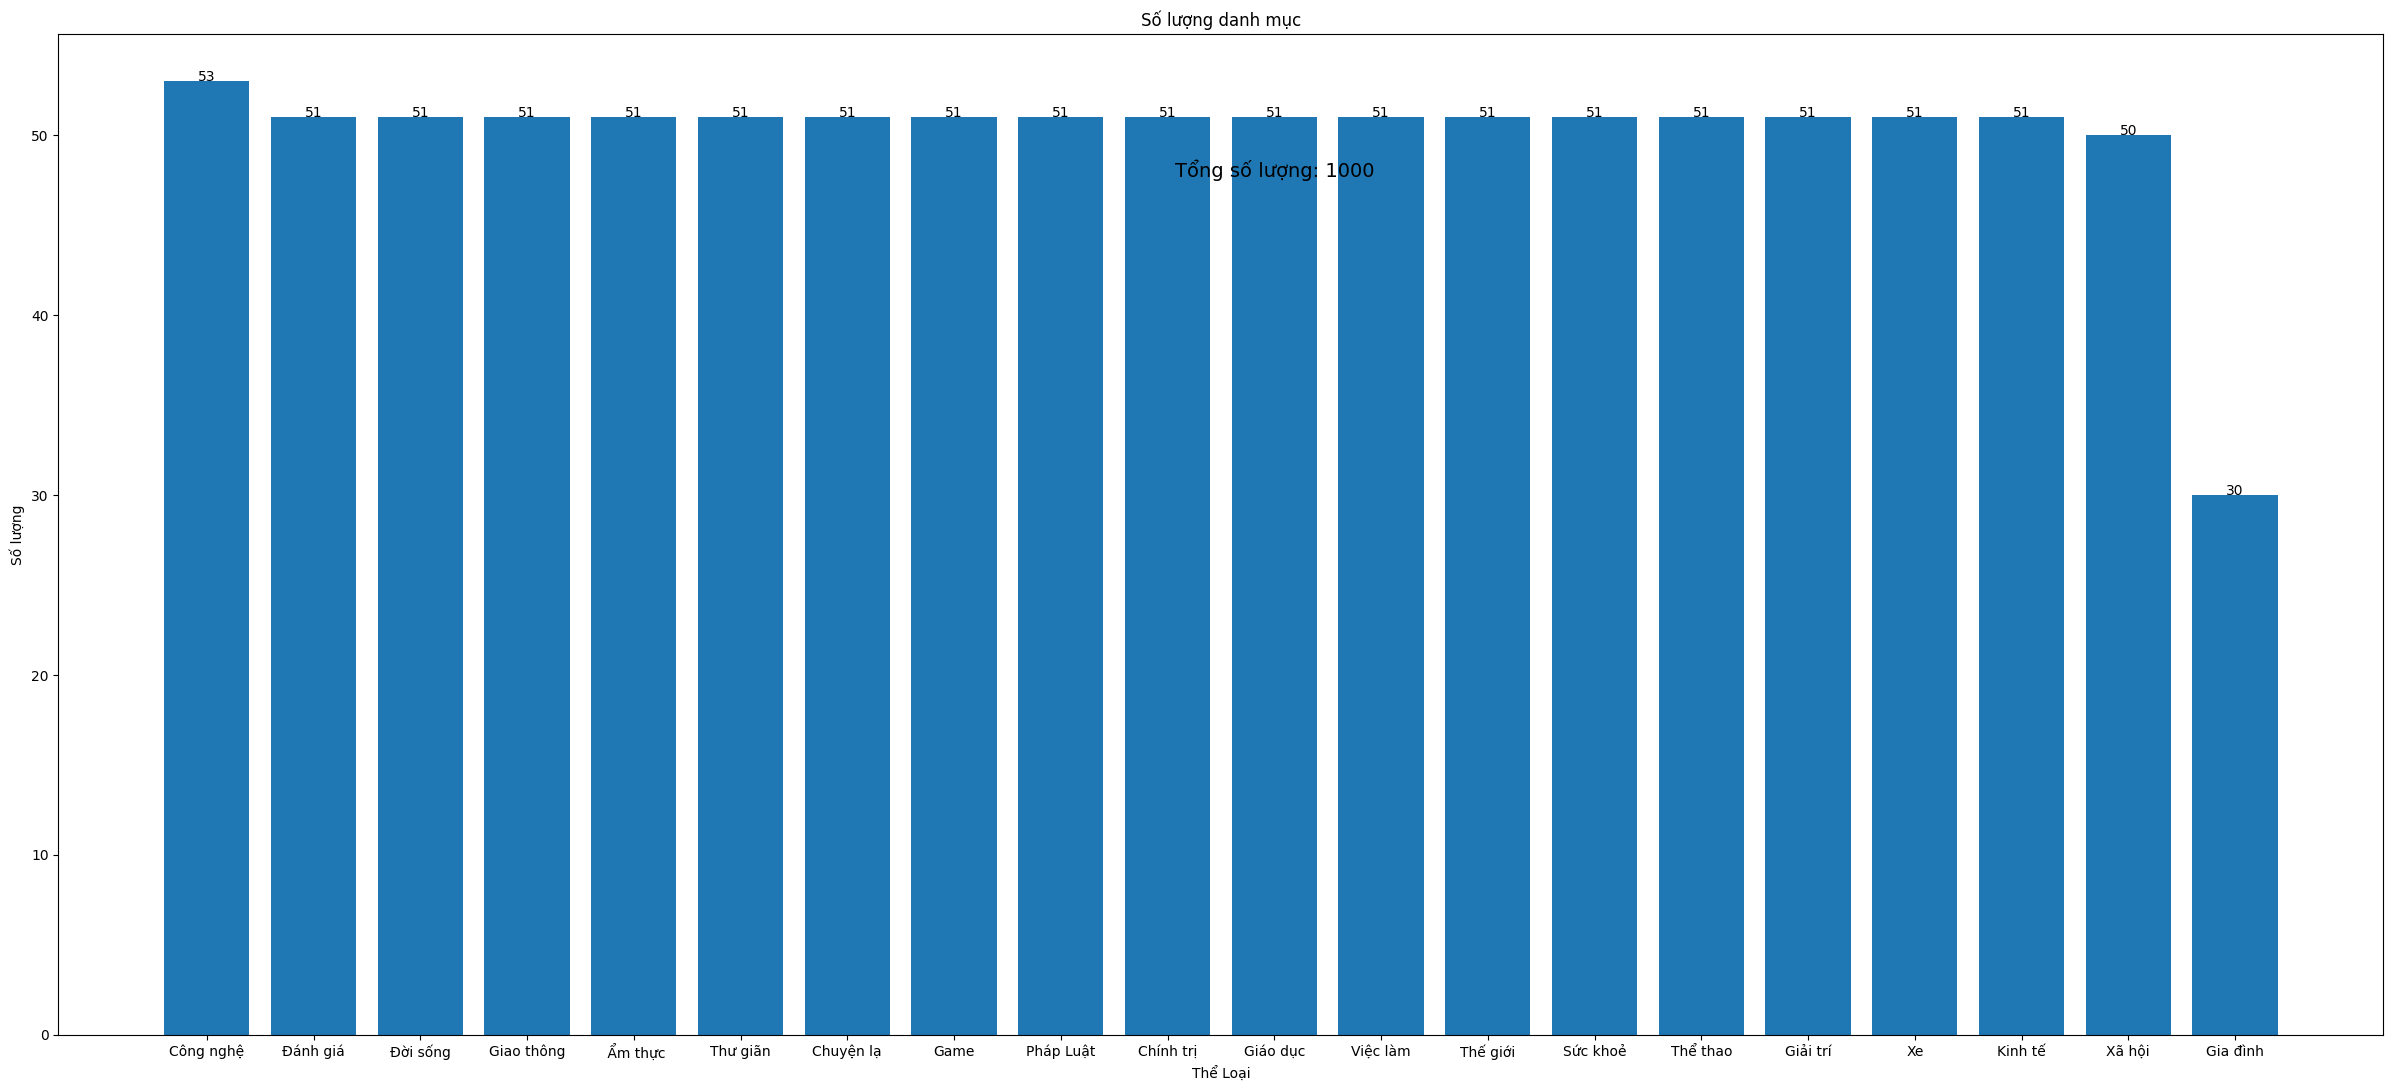

In [ ]:
data = pd.read_excel(output_excel_path)
# Tạo một hình ảnh với kích thước lớn hơn
plt.figure(figsize=(30, 13))
category_counts = data["Thể Loại"].value_counts()
total_count = sum(category_counts.values)
import matplotlib.pyplot as plt
plt.bar(category_counts.index, category_counts.values)
for i, v in enumerate(category_counts.values): plt.text(i, v, str(v), ha='center')
plt.text(len(category_counts) / 2, max(category_counts.values) * 0.9, f"Tổng số lượng: {total_count}", ha='center', fontsize=14)
plt.title("Số lượng danh mục")
plt.xlabel("Thể Loại")
plt.ylabel("Số lượng")
plt.show()

#vector

In [5]:


# Đọc dữ liệu từ file Excel
df = pd.read_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/ngữ nghĩa.xlsx')
df.fillna("", inplace=True)
# Ghép các cột thành một chuỗi
combined_text = df["Tiêu Đề"] + " " + df["Thể Loại"]+ " " + df["Mô Tả"] + " " + df["Nội Dung"]
# combined_text = df["Tiêu Đề"]
# Khởi tạo mô hình vector hóa
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Vector hóa dữ liệu
vectorized_data = vectorizer.fit_transform(combined_text)

# Lưu mô hình vector hóa vào file
joblib.dump(vectorizer, "vectorizer.joblib")


['vectorizer.joblib']

In [6]:
vectorizer = joblib.load("vectorizer.joblib")
print(vectorizer.idf_)


[6.81014249 6.52246042 6.52246042 ... 3.27402579 4.41224722 2.32150612]


#Tìm kiếm



In [ ]:

# Nhập từ khóa tìm kiếm
query = input("Nhập từ khóa tìm kiếm: ")

# Đọc dữ liệu từ file Excel
df = pd.read_excel('/content/drive/MyDrive/Báo Cáo Nhóm 3/test.xlsx')

# Load mô hình vector hóa từ file
vectorizer = joblib.load("vectorizer.joblib")

# Vector hóa câu truy vấn
query_vector = vectorizer.transform([query])

# Tính toán độ tương đồng giữa câu truy vấn và từng văn bản trong dữ liệu
similarity_scores = np.dot(vectorized_data, query_vector.T).toarray()

# Sắp xếp theo điểm số tương đồng giảm dần
results = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)
i=0
# In kết quả
for r in results:
    if(i<5):i=i+1
    else: break
    index = r[0]
    title = df.loc[index]["Tiêu Đề"]
    C=df.loc[index]["Thể Loại"]
    d=df.loc[index]["Nội Dung"]
    
    print(str(i)+": "+f"{title} - {r[1][0]} - {C}")
    print(f"{d}")


Nhập từ khóa tìm kiếm: tính năng khiến bạn phải mua ngay oneplus
1: 5 tính năng khiến bạn phải mua ngay OnePlus 9 - 0.7403088186682197 - Đánh giá
Video đánh giá thực tế OnePlus 9 và OnePlus 9 Pro. Có thể nói, OnePlus 9 Pro là điện thoại tốt nhất mà OnePlus từng sản xuất và mặc dù chưa được tích hợp những công nghệ đầu bảng như các flagship khác nhưng chúng dễ làm mềm lòng người tiêu dùng vì mức giá hợp lý. OnePlus 9 có cấu hình không bằng “người anh lớn” nhưng lại có nhiều tính năng thú vị và mức giá khởi điểm thấp hơn.  Dưới đây là 5 lý do chính để sở hữu OnePlus 9 lúc này. 1. Tuổi thọ pin tốt hơn OnePlus 9 có cùng dung lượng pin với OnePlus 9 Pro nhưng lại có tuổi thọ pin dài hơn. Tại sao vậy? Lý do có lẽ nằm ở màn hình. Với kích thước 6,55 inch và độ phân giải 2.400x1.080 pixel, màn hình của máy nhỏ hơn và  có độ phân giải thấp hơn một chút so với OnePlus 9 Pro, bớt hao pin hơn. Trong các bài kiểm tra, điện thoại có thể trụ được 23 giờ cực kỳ ấn tượng, ngang bằng với Galaxy S21 Ultr